In [2]:
%%time
import cv2
import os
import numpy as np
import tensorflow as tf
import keras
from sklearn.mixture import GaussianMixture
from sklearn import mixture
from scipy.spatial import distance
from tqdm.notebook import tqdm
import seaborn
import matplotlib.pyplot as plt
#from ipywidgets import IntProgress


CPU times: user 2.24 s, sys: 870 ms, total: 3.11 s
Wall time: 1min 17s


In [401]:
%%time
def load_images_from_folder(folder):
    images = []
    for filename in tqdm(sorted(os.listdir(folder))):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        if img is not None:
            images.append(img)
    return np.array(images)

path = load_images_from_folder("/home/ws575033/thesis_nb/Train_fin")
path.shape

  0%|          | 0/110 [00:00<?, ?it/s]

CPU times: user 6.49 s, sys: 3.04 s, total: 9.53 s
Wall time: 587 ms


(110, 224, 224, 3)

In [402]:
%%time

#####Model for extracting features
mobilenetv2 = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)


CPU times: user 779 ms, sys: 53.8 ms, total: 833 ms
Wall time: 810 ms


In [ ]:
vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)

In [ ]:
Xception = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)

In [ ]:
resnet50v2 = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(96, 96, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)

In [ ]:
# Inception_ResNetv2 = tf.keras.applications.InceptionResNetV2(
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=(96, 96, 3),
#     pooling=None,
#     #classes=1000,
#     #classifier_activation="softmax",
# )

In [ ]:
%%time
effnetB3 = tf.keras.applications.EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)
#effnetB3.summary()
model = effnetB3  # create the original model
inputs = (224, 224, 3)
layer_name = 'block6f_add'
intermediate_layer_modelb3 = keras.Model(inputs=model.input,
                                        outputs=model.get_layer(layer_name).output)
#intermediate_output = intermediate_layer_model(path)
intermediate_layer_modelb3.summary()

In [403]:
effnetB4 = tf.keras.applications.EfficientNetB4(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)
#effnetB4.summary()
model = effnetB4  # create the original model
inputs = (224, 224, 3)
layer_name = 'block6h_add'
intermediate_layer_modelb4 = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
#intermediate_output = intermediate_layer_model(path)
intermediate_layer_modelb4.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 12,374,763
Trainable params: 12,272,212
Non-trainable params: 102,551
__________________________________________________________________________________________________


In [ ]:
effnetB5 = tf.keras.applications.EfficientNetB5(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)
#effnetB5.summary()
model = effnetB5  # create the original model
inputs = (224, 224, 3)
layer_name = 'block6i_add'
intermediate_layer_modelb5 = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
#intermediate_output = intermediate_layer_model(path)
intermediate_layer_modelb5.summary()

In [ ]:
effnetB6 = tf.keras.applications.EfficientNetB6(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    #classes=1000,
    #classifier_activation="softmax",
)
#effnetB6.summary()
model = effnetB6  # create the original model
inputs = (224, 224, 3)
layer_name = 'block6k_add'
intermediate_layer_modelb6 = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
#intermediate_output = intermediate_layer_model(path)
intermediate_layer_modelb6.summary()

In [ ]:
# effnetB7 = tf.keras.applications.EfficientNetB7(
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=(96, 96, 3),
#     pooling=None,
#     #classes=1000,
#     #classifier_activation="softmax",
# )

In [404]:
%%time

#model predict
features = intermediate_layer_modelb4.predict(
    path,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
features.shape

CPU times: user 31.7 s, sys: 12.6 s, total: 44.3 s
Wall time: 3.72 s


(110, 7, 7, 272)

In [5]:
features_linear = features.reshape(-1, features.shape[-1])
features_linear.shape

(5390, 272)

In [ ]:
from scipy.stats import multivariate_normal


In [ ]:
m = np.mean(features_linear, axis=0)
m.shape

In [ ]:
c = np.cov(features)

In [ ]:
import numpy as np
import scipy.linalg as linalg

def multivariateGaussian(X, mu, sigma2):
    #MULTIVARIATEGAUSSIAN Computes the probability density function of the
    #multivariate gaussian distribution.
    #    p = MULTIVARIATEGAUSSIAN(X, mu, sigma2) Computes the probability 
    #    density function of the examples X under the multivariate gaussian 
    #    distribution with parameters mu and sigma2. If sigma2 is a matrix, it is
    #    treated as the covariance matrix. If sigma2 is a vector, it is treated
    #    as the \sigma^2 values of the variances in each dimension (a diagonal
    #    covariance matrix)
    #

    k = len(mu)

    # turns 1D array into 2D array
    if sigma2.ndim == 1:
        sigma2 = np.reshape(sigma2, (-1,sigma2.shape[0]))

    if sigma2.shape[1] == 1 or sigma2.shape[0] == 1:
        sigma2 = linalg.diagsvd(sigma2.flatten(), len(sigma2.flatten()), len(sigma2.flatten()))

    # mu is unrolled (and transposed) here
    X = X - mu.reshape(mu.size, order='F').T

    p = np.dot(np.power(2 * np.pi, - k / 2.0), np.power(np.linalg.det(sigma2), -0.5) ) * \
        np.exp(-0.5 * np.sum(np.dot(X, np.linalg.pinv(sigma2)) * X, axis=1))

    return p

In [ ]:
multivariateGaussian(features_linear, None, 0.5)

In [ ]:
c.shape

In [ ]:
g = multivariate_normal.pdf(features_linear.reshape(-1))

In [ ]:
g.mean()


In [405]:
%%time
from sklearn.mixture import GaussianMixture
#Gaussian mixture model
gm = GaussianMixture(n_components=1, random_state=0).fit(features_linear)
#print("gm", gm)
#mvg = gm.sample()
#plt.imshow(mvg)
#seaborn.distplot(mvg)
print("gm_means", gm.means_.shape)
print("gm_covariance", gm.covariances_.shape)
inv_cov = np.linalg.inv(gm.covariances_)
#print("inv_covariance", inv_cov)

gm_means (1, 272)
gm_covariance (1, 272, 272)
CPU times: user 209 ms, sys: 15.2 ms, total: 225 ms
Wall time: 305 ms


In [406]:
%%time

###################Test per frame###########################
test_image = load_images_from_folder("/home/ws575033/thesis_nb/Test_fin")
print("Test_image", test_image.shape)
dist_list=[]
for i in range(len(test_image)):
    tes = test_image[i]
    tes = np.expand_dims(tes, axis=0)
    #extract features
    features2 = intermediate_layer_modelb4.predict(
    tes,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    )
    #print(features2.shape)

    #for i in range(features2.shape[0]):
    
    features2_linear = features2.reshape(-1, features2.shape[-1])
    #print("features2_shape", features2_linear.shape)

    #Mahalonobis distance
    maha = distance.cdist(gm.means_, features2_linear, 'mahalanobis', VI=inv_cov)
    #seaborn.distplot(maha)
    #plt.imshow(maha)
    #seaborn.distplot(gm.means_)
    #plt.imshow(gm.means_)
    print("mahalonobis distance shape", maha.shape)
    #print("mahalonobis distance", maha.reshape(-1, 7))
    print(i, "mahalonobis distance ------------------------------>>>>>>>", maha.max())
    
    dist_list.append(maha.max())
dist_list = np.array(dist_list)
dist_list.shape

  0%|          | 0/422 [00:00<?, ?it/s]

Test_image (422, 224, 224, 3)
mahalonobis distance shape (1, 49)
0 mahalonobis distance ------------------------------>>>>>>> 38.87551342221603
mahalonobis distance shape (1, 49)
1 mahalonobis distance ------------------------------>>>>>>> 39.3877669385066
mahalonobis distance shape (1, 49)
2 mahalonobis distance ------------------------------>>>>>>> 40.10794139797337
mahalonobis distance shape (1, 49)
3 mahalonobis distance ------------------------------>>>>>>> 39.48718542723974
mahalonobis distance shape (1, 49)
4 mahalonobis distance ------------------------------>>>>>>> 39.22566522342685
mahalonobis distance shape (1, 49)
5 mahalonobis distance ------------------------------>>>>>>> 38.69621478455219
mahalonobis distance shape (1, 49)
6 mahalonobis distance ------------------------------>>>>>>> 39.335018986506576
mahalonobis distance shape (1, 49)
7 mahalonobis distance ------------------------------>>>>>>> 39.43117925299263
mahalonobis distance shape (1, 49)
8 mahalonobis distance 

mahalonobis distance shape (1, 49)
71 mahalonobis distance ------------------------------>>>>>>> 60.658565736086445
mahalonobis distance shape (1, 49)
72 mahalonobis distance ------------------------------>>>>>>> 57.588324854836124
mahalonobis distance shape (1, 49)
73 mahalonobis distance ------------------------------>>>>>>> 62.36664151342773
mahalonobis distance shape (1, 49)
74 mahalonobis distance ------------------------------>>>>>>> 64.68364150956894
mahalonobis distance shape (1, 49)
75 mahalonobis distance ------------------------------>>>>>>> 65.6000256306416
mahalonobis distance shape (1, 49)
76 mahalonobis distance ------------------------------>>>>>>> 65.40827126440459
mahalonobis distance shape (1, 49)
77 mahalonobis distance ------------------------------>>>>>>> 61.208201779700254
mahalonobis distance shape (1, 49)
78 mahalonobis distance ------------------------------>>>>>>> 62.09458840936665
mahalonobis distance shape (1, 49)
79 mahalonobis distance -------------------

mahalonobis distance shape (1, 49)
142 mahalonobis distance ------------------------------>>>>>>> 34.9329976579289
mahalonobis distance shape (1, 49)
143 mahalonobis distance ------------------------------>>>>>>> 33.592881393806806
mahalonobis distance shape (1, 49)
144 mahalonobis distance ------------------------------>>>>>>> 32.30541477480323
mahalonobis distance shape (1, 49)
145 mahalonobis distance ------------------------------>>>>>>> 31.81823533930054
mahalonobis distance shape (1, 49)
146 mahalonobis distance ------------------------------>>>>>>> 45.04476974419033
mahalonobis distance shape (1, 49)
147 mahalonobis distance ------------------------------>>>>>>> 31.422202796888094
mahalonobis distance shape (1, 49)
148 mahalonobis distance ------------------------------>>>>>>> 34.76287667910331
mahalonobis distance shape (1, 49)
149 mahalonobis distance ------------------------------>>>>>>> 32.772811457249944
mahalonobis distance shape (1, 49)
150 mahalonobis distance ----------

mahalonobis distance shape (1, 49)
214 mahalonobis distance ------------------------------>>>>>>> 66.58977072621737
mahalonobis distance shape (1, 49)
215 mahalonobis distance ------------------------------>>>>>>> 123.95037877496661
mahalonobis distance shape (1, 49)
216 mahalonobis distance ------------------------------>>>>>>> 123.42535040389627
mahalonobis distance shape (1, 49)
217 mahalonobis distance ------------------------------>>>>>>> 133.19239972199918
mahalonobis distance shape (1, 49)
218 mahalonobis distance ------------------------------>>>>>>> 115.72619206530361
mahalonobis distance shape (1, 49)
219 mahalonobis distance ------------------------------>>>>>>> 114.55161691779297
mahalonobis distance shape (1, 49)
220 mahalonobis distance ------------------------------>>>>>>> 138.03755066090045
mahalonobis distance shape (1, 49)
221 mahalonobis distance ------------------------------>>>>>>> 123.1297463796319
mahalonobis distance shape (1, 49)
222 mahalonobis distance ------

mahalonobis distance shape (1, 49)
286 mahalonobis distance ------------------------------>>>>>>> 119.31250569963828
mahalonobis distance shape (1, 49)
287 mahalonobis distance ------------------------------>>>>>>> 122.83708527011768
mahalonobis distance shape (1, 49)
288 mahalonobis distance ------------------------------>>>>>>> 125.8333064492616
mahalonobis distance shape (1, 49)
289 mahalonobis distance ------------------------------>>>>>>> 123.73729490148017
mahalonobis distance shape (1, 49)
290 mahalonobis distance ------------------------------>>>>>>> 120.00700088624805
mahalonobis distance shape (1, 49)
291 mahalonobis distance ------------------------------>>>>>>> 118.57727625580655
mahalonobis distance shape (1, 49)
292 mahalonobis distance ------------------------------>>>>>>> 118.30440466000795
mahalonobis distance shape (1, 49)
293 mahalonobis distance ------------------------------>>>>>>> 115.82890582359603
mahalonobis distance shape (1, 49)
294 mahalonobis distance -----

mahalonobis distance shape (1, 49)
358 mahalonobis distance ------------------------------>>>>>>> 87.12027781135991
mahalonobis distance shape (1, 49)
359 mahalonobis distance ------------------------------>>>>>>> 93.20420872555512
mahalonobis distance shape (1, 49)
360 mahalonobis distance ------------------------------>>>>>>> 86.33081168610487
mahalonobis distance shape (1, 49)
361 mahalonobis distance ------------------------------>>>>>>> 112.23154691197514
mahalonobis distance shape (1, 49)
362 mahalonobis distance ------------------------------>>>>>>> 96.98454604536371
mahalonobis distance shape (1, 49)
363 mahalonobis distance ------------------------------>>>>>>> 117.57237341226875
mahalonobis distance shape (1, 49)
364 mahalonobis distance ------------------------------>>>>>>> 102.72259263125667
mahalonobis distance shape (1, 49)
365 mahalonobis distance ------------------------------>>>>>>> 170.45176151500058
mahalonobis distance shape (1, 49)
366 mahalonobis distance --------

(422,)

In [ ]:
max(dist_list)

In [387]:
%%time
################### Test per patch ###########################
test_image = load_images_from_folder("/home/ws575033/thesis_nb/Data_set/grid_values/sequence of img/real_time")
print("Test_image", test_image.shape)
dist_list=[]
for i in range(len(test_image)):
    tes = test_image[i]
    tes = np.expand_dims(tes, axis=0)
    #extract features
    features2 = intermediate_layer_modelb4.predict(
    tes,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    )
    #print(features2.shape)

    #for i in range(features2.shape[0]):
    
    features2_linear = features2.reshape(-1, features2.shape[-1])
    print("features2_shape", features2_linear.shape)

    #Mahalonobis distance
    maha = distance.cdist(gm.means_, features2_linear, 'mahalanobis', VI=inv_cov)
    maha_new = maha.reshape(-1, 7)
    #seaborn.distplot(maha)
    #plt.imshow(maha)
    #seaborn.distplot(gm.means_)
    #plt.imshow(gm.means_)
    print("mahalonobis distance shape", maha.shape)
    print("mahalonobis distance", maha.reshape(-1, 7))
    print(i, "mahalonobis distance ------------------------------>>>>>>>", maha.max())
    
    dist_list.append(maha)
dist_list = np.array(dist_list)
dist_list.shape

  0%|          | 0/1 [00:00<?, ?it/s]

Test_image (1, 224, 224, 3)
features2_shape (49, 272)
mahalonobis distance shape (1, 49)
mahalonobis distance [[108.38378816 118.48289034  43.2032802   31.43740882  27.46118358
   26.24545164  43.81581601]
 [102.39682376 118.48971103  50.12941939  31.84385051  21.59900244
   25.56537786  30.8567312 ]
 [ 71.62551859 124.23976987  51.39451826  33.09845342  21.59829255
   25.23822248  27.88375708]
 [ 54.41953632  68.98931417  34.50010687  23.77690351  19.24831139
   23.15629408  29.59597659]
 [ 31.57709846  32.05470782  24.1608058   19.19374716  18.78521727
   31.03580056  52.09294953]
 [ 27.18774306  23.20893891  22.50468135  18.18422377  16.24891617
   21.24702827  39.36379994]
 [ 18.87408404  16.83435922  18.97091065  16.08328722  15.45067014
   16.10278223  23.38196802]]
0 mahalonobis distance ------------------------------>>>>>>> 124.23976987115202
CPU times: user 460 ms, sys: 531 ms, total: 991 ms
Wall time: 147 ms


(1, 1, 49)

In [ ]:
import pandas as pd
import seaborn as sns
a = dist_list.reshape(-1, 49)
x = pd.DataFrame(a)
b = x.T


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
e = pd.read_csv("/home/ws575033/thesis_nb/Data_set/grid_values/Results/hist.csv")

thresh = 50
plt.hist(e.Anomaly_Score, bins=75)
plt.axvline(x=thresh, color='r', linestyle='solid', linewidth=2)

CPU times: user 152 ms, sys: 56 ms, total: 208 ms
Wall time: 211 ms


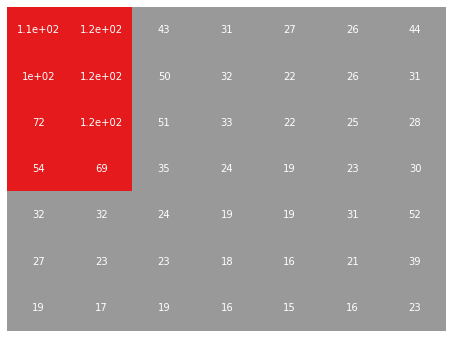

In [391]:
%%time
# ######################## Heat Map ##########################

import pandas as pd
import seaborn as sns 
import dataframe_image as dfi 
import numpy as np  

for i in range(dist_list.shape[0]): 
    x = dist_list[i].reshape(7,7)
    fig = plt.figure()
#supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
    ax= sns.heatmap(x,vmin=52,vmax=53,  cmap='Set1_r',annot=True,cbar=False)
    #ax= sns.heatmap(x,vmin=30,vmax=40,  cmap='Set1_r',annot=True,cbar=False)#bone, copper
    ax.axis('off')
    fig.set_size_inches(640/100,480/100)
    plt.tight_layout()
    #plt.show()
    fig.savefig(f"/home/ws575033/thesis_nb/Data_set/grid_values/res/cross{i}.jpg",pad_inches=0.1, dpi=100)

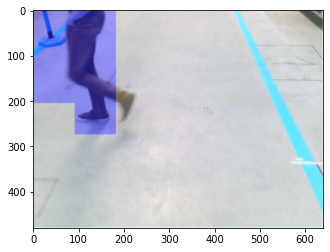

In [389]:
for file in os.listdir('/home/ws575033/thesis_nb/Data_set/grid_values/sequence of img/real_time'):
    n = file.split(".")[0]
    img1 = cv2.imread(f"/home/ws575033/thesis_nb/Data_set/grid_values/res/cross{n}.jpg")
    img2 = cv2.imread(f'/home/ws575033/thesis_nb/Data_set/grid_values/sequence of img/real_time/{n}.jpg')

    body = img1[14:-14, 14:-14]

    width= 640
    hight= 480
    dim=(width, hight)
    img3 = cv2.resize(body, dim, interpolation=cv2.INTER_AREA)


    dst = cv2.addWeighted(img2,1.0,img3,0.5,0)

    cv2.imwrite(f"/home/ws575033/thesis_nb/Data_set/grid_values/res/cross_{n}.jpg", dst)
    plt.imshow(dst)

In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# def load_img_from_folder(folder):
#     img1 = []
#     img2 = []
#     for filename in tqdm(sorted(os.listdir(folder))):
#         img = cv2.imread(os.path.join(folder,filename))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = cv2.resize(img, (224, 224))
#         if img is not None:
#             img1.append(img)
#             img2.append(img)
#     return np.array(images)

# path1 = load_img_from_folder("/home/ws575033/thesis_nb/Data_set/grid_values/res/")
# path2 = load_img_from_folder("/home/ws575033/thesis_nb/Data_set/grid_values/trolley1/")
# path.shape

# img1 = cv2.imread("/home/ws575033/thesis_nb/Data_set/grid_values/res/trol0.jpg")
# img2 = cv2.imread("/home/ws575033/thesis_nb/Data_set/grid_values/trolley1/1590668982109888984.jpg")

# body = img1[14:-14, 14:-14]

# width= 640
# hight= 480
# dim=(width, hight)
# img3 = cv2.resize(body, dim, interpolation=cv2.INTER_AREA)


# dst = cv2.addWeighted(img2,1.0,img3,0.5,0)

# cv2.imwrite("/home/ws575033/thesis_nb/Data_set/grid_values/res/trol_0.jpg", dst)
# plt.imshow(dst)

In [ ]:
# import pandas as pd
# import seaborn as sns
# import dataframe_image as dfi
# import numpy as np

# d = pd.DataFrame(dist_list[0].reshape(7,7))

# # displaying dataframe as an heatmap 
# # with diverging colourmap as virdis
# fig = plt.figure()
# #supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
# ax= sns.heatmap(d,cmap='Purples_r',annot=False,cbar=False) #icefire, magma_r, pink, _r, Purples_r, RdYlGn_r
# ax.axis('off')
# fig.set_size_inches(640/100,480/100)
# plt.tight_layout()
# plt.show()
# fig.savefig("/home/ws575033/thesis_nb/Data_set/grid_values/res/trol0.jpg",pad_inches=0.1, dpi=100) #,bbox_inches='tight'




In [ ]:
# import cv2
# import matplotlib.pyplot as plt


# img1 = cv2.imread("/home/ws575033/thesis_nb/Data_set/grid_values/res/trol0.jpg")
# img2 = cv2.imread("/home/ws575033/thesis_nb/Data_set/grid_values/trolley1/1590668982109888984.jpg")

# body = img1[14:-14, 14:-14]

# width= 640
# hight= 480
# dim=(width, hight)
# img3 = cv2.resize(body, dim, interpolation=cv2.INTER_AREA)


# dst = cv2.addWeighted(img2,1.0,img3,0.5,0)

# cv2.imwrite("/home/ws575033/thesis_nb/Data_set/grid_values/res/trol_0.jpg", dst)
# plt.imshow(dst)

In [ ]:
########################### Make video  ################################

import cv2
import numpy as np
import glob
 
img_array = []
for filename in glob.glob('/home/ws575033/thesis_nb/Data_set/grid_values/Results/video/MVG/Trolley/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('/home/ws575033/thesis_nb/Data_set/grid_values/Results/video/MVG/Trolley/project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [ ]:
import cv2 # pip install opencv-python
import os
from o.path import isfile,join
def convert_pictures_to_video(pathIn,pathout,fps,time):

    frame_array=[]
    files=[f for f in os.listdir(pathIn)if isfile(join(pathIn,f))]
    for i in range (len(files)):
        filename=pathIn+files[i]

        img=cv2.imread(filename)
        height,width,layers=img.shape
        size=(width,height)
    
        for k in range (time):
            frame_array.append(img)
    out=cv2.Videowriter(pathout,cv2.Videowriter_fourcc(*'mp4v',fps,size))
    for i in range(len(frame_array)):
        out.write(frame_array[i])
    out.release(


directory=(r'/home/ws575033/thesis_nb/Data_set/grid_values/Results/video/MVG/Trolley')
pathIn=directory+'/*.jpg'
pathout=pathIn+'video_EX9.avi'
fps=1
time=20 # the duration of each picture in the video
convert_pictures_to_video(pathIn,pathout,fps,time)

In [ ]:
import cv2
import numpy as np
import glob

frameSize = (480, 640)

out = cv2.VideoWriter('output_video.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 1, frameSize)

for filename in glob.glob('/home/ws575033/thesis_nb/Data_set/grid_values/Results/video/MVG/Trolley/*.jpg'):
    img = cv2.imread(filename)
    out.write(img)

out.release()

In [ ]:
######################## Data Frame for seq of images ##########################

import pandas as pd
d = pd.DataFrame()
for i in range(7):
    d[str(i)] = maha.reshape(7,7)[:,i]
d



In [ ]:
######################## Data Frame ##########################


import pandas as pd
d = pd.DataFrame()
for i in range(7):
    d[str(i)] = maha.reshape(7,7)[:,i]
d

import pandas as pd
import numpy as np

def highlight_max(s):
    is_max = s == maha.max()
    return ['background-color: red' if v else '' for v in is_max]

d.style.apply(highlight_max)
    

In [ ]:
# ######################## Heat Map ##########################

# import pandas as pd
# import seaborn as sns
# import dataframe_image as dfi


# # displaying dataframe as an heatmap 
# # with diverging colourmap as virdis
# fig = plt.figure()
# #supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
# ax= sns.heatmap(d,cmap='icefire',annot=False,cbar=False) #icefire, magma_r, pink, _r, turbo_r
# ax.axis('off')
# fig.set_size_inches(640/100,480/100)
# plt.tight_layout()
# plt.show()
# fig.savefig("/home/ws575033/thesis_nb/Data_set/grid_values/res/troll1.jpg",pad_inches=0.1, dpi=100) #,bbox_inches='tight'

In [ ]:


# import cv2
# import matplotlib.pyplot as plt


# img1 = cv2.imread("/home/ws575033/thesis_nb/Data_set/grid_values/res/troll1.jpg")
# img2 = cv2.imread("/home/ws575033/thesis_nb/Data_set/grid_values/trolley1/1590668982109888984.jpg")

# body = img1[14:-14, 14:-14]

# width= 640
# hight= 480
# dim=(width, hight)
# img3 = cv2.resize(body, dim, interpolation=cv2.INTER_AREA)


# dst = cv2.addWeighted(img2,1.0,img3,0.5,0)

# cv2.imwrite("/home/ws575033/thesis_nb/Data_set/grid_values/res/troll_g.jpg", dst)
# plt.imshow(dst)

In [ ]:
# import cv2
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt
    
# # Take two images for blending them together   
# image1 = Image.open('/home/ws575033/thesis_nb/Data_set/grid_values/trolley1/1590668982109888984.jpg')
# image2 = Image.open("/home/ws575033/thesis_nb/Data_set/grid_values/res/trol1.jpg")

# # Make sure images got an alpha channel
# image5 = image1.convert("RGBA")
# image6 = image2.convert("RGBA")


# # alpha-blend the images with varying values of alpha
# alphaBlended = Image.blend(image5, image6, alpha=.4)

# # Display the alpha-blended images
# #alphaBlended.show()
# plt.savefig('/home/ws575033/thesis_nb/Data_set/grid_values/res/trol1_F.jpg', bbox_inches='tight')
# plt.imshow(alphaBlended)

In [ ]:
# import matplotlib.pyplot as plt
# from skimage import data
# from skimage.filters import threshold_otsu, threshold_mean, threshold_triangle
# from skimage.color import rgb2gray

# test_image = load_images_from_folder("Test2/")
# test_image = rgb2gray(test_image[0])
# #thresh = threshold_triangle(test_image)
# #binary = test_image > thresh

# fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
# ax = axes.ravel()
# ax[0] = plt.subplot(1, 3, 1)
# ax[1] = plt.subplot(1, 3, 2)
# ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

# ax[0].imshow(test_image, cmap=plt.cm.gray)
# ax[0].set_title('Original')
# ax[0].axis('off')

# ax[1].hist(test_image.ravel(), bins=256)
# ax[1].set_title('Histogram')
# ax[1].axvline(thresh, color='r')

# ax[2].imshow(binary, cmap=plt.cm.gray)
# ax[2].set_title('Thresholded')
# ax[2].axis('off')

# plt.show()

In [ ]:
import os
def load_folder_rgb(path, ext="jpg", sz=(224, 224)):
    files= os.listdir(path)
    result = []
    for file in files:
        if ext in file:
            img=cv2.imread(path+file)
            img = cv2.resize(img, sz)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_hsv=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
            result.append(img_hsv)

    return np.array(result)


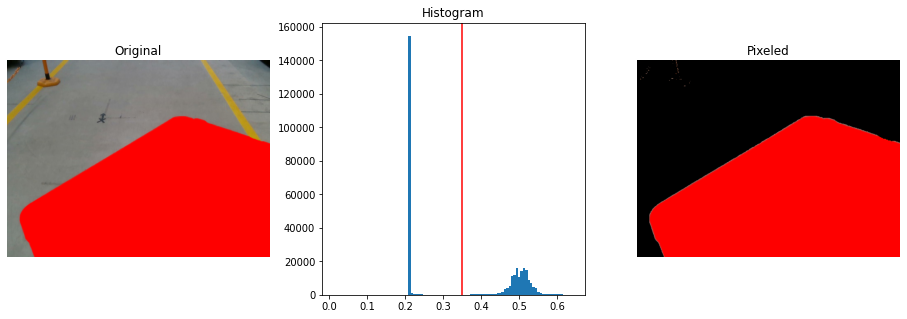

In [7]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu, threshold_mean, threshold_triangle, threshold_minimum
from skimage.color import rgb2gray

#test_image = load_images_from_folder("Test1/")
img=cv2.imread("/home/ws575033/thesis_nb/test_img/1590668986536424670.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img_rgb.copy()
output_img[np.where(mask==0)] = 0

opt_img= rgb2gray(img_rgb)
thresh = threshold_minimum(opt_img)
binary = opt_img > thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img_rgb, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(opt_img.ravel(), bins=100)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(output_img)
ax[2].set_title('Pixeled')
ax[2].axis('off')

plt.show()
fig.savefig('Intensity_based.svg', dpi=2160)

In [ ]:
arr = np.array(maha)
arr.max(), arr.min()

In [ ]:
if maha.max()>17:
  print("ANOMALY")
else:
  print("NO ANOMALY")

In [ ]:
output = arr.max()>100

In [ ]:
########################################### METRICS ################################################

In [407]:
########################################### per frame ################################################
import pandas as pd
from sklearn.metrics import accuracy_score
p = pd.read_csv("/home/ws575033/thesis_nb/test_fin.csv")
p.head()
labels = p.labels.values

p.labels


0      0
1      0
2      0
3      0
4      0
      ..
417    1
418    1
419    1
420    1
421    1
Name: labels, Length: 422, dtype: int64

In [ ]:
########################################### per patch ################################################
import pandas as pd
from sklearn.metrics import accuracy_score
p = pd.read_csv("/home/ws575033/thesis_nb/Data_set/grid_values/cross.csv")
p

In [408]:
#################################### AUC_ROC curve ########################

import numpy as np

def roc_curve_calculation(y_true, prediction, thresholds):

    fpr = []
    tpr = []
    acc = []

    for threshold in thresholds:

        y_pred = np.where(prediction >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
        

    return fpr, tpr

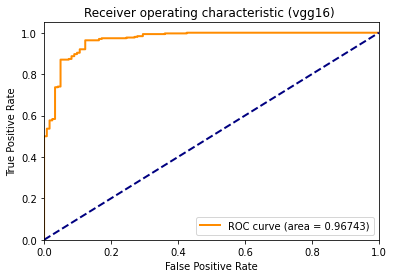

In [409]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
import numpy as np
import pickle
from scipy import interpolate

a= np.arange(0, 200,0.001)
acc = []
ktf = []
rtf = []
fpr_list = []
tpr_list = []

fpr, tpr = roc_curve_calculation(labels, dist_list, a)
# import pickle
# filename = 'mvg_Xception_fpr'
# outfile = open(filename,'wb')
# pickle.dump(fpr,outfile)
# outfile.close()

# filename = 'mvg_Xception_tpr'
# outfile = open(filename,'wb')
# pickle.dump(tpr,outfile)
# outfile.close()

# infile = open('effb4_tpr','rb')
# tpr = pickle.load(infile)
# infile.close()

# infile = open('effb4_fpr','rb')
# fpr = pickle.load(infile)
# infile.close()

roc_auc = auc(fpr, tpr)
#plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',
             lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (vgg16) ')
plt.legend(loc="lower right") 
plt.show()

In [ ]:
tpr


In [ ]:
fpr

In [ ]:
# from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import RocCurveDisplay
# from sklearn.metrics import accuracy_score
# import numpy as np

# a= np.arange(0, 5000, 10)

# cntr = 0
# acc = []
# ktf = []
# rtf = []
# fpr = dict()
# tpr = dict()
# curves = dict()
# roc_auc = dict()


# for c in a:
#     kt = d>c
#     kt  = kt.values.flatten()
#     ktf.append(kt)
#     rtf.append(p.values.flatten())
#     #rint(kt.shape)
#     acc.append(accuracy_score(kt,p.values.flatten()))
# for i in range(len(ktf)):
#     fpr[i], tpr[i], _ = roc_curve(rtf[i], ktf[i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# #print(acc)
# l = max(acc)
# ac = acc.index(l)
# #print(ac)
# print(max(acc))
# #plt.figure()
# lw = 2
# plt.plot(fpr[ac],tpr[ac],color='darkorange',
#              lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[ac])
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic (MobileNetV2) ')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
import pandas as pd
d = {'Threshold_values':a,'Accuracy':acc, 'Test_values':rtf, 'Test_scores':ktf}
df = pd.DataFrame(d)
df

In [ ]:
import pandas as pd

df.to_csv("/home/ws575033/thesis_nb/Data_set/grid_values/Results/data_sheet.csv")


In [ ]:
# from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import RocCurveDisplay
# from sklearn.metrics import accuracy_score

# count = 0
# ktf = []
# rtf = [] 
# for i in range(10,80,1):
#     count+=0.5
#     #print(p.values.flatten().shape, d.values.flatten().clip(i).shape)
#     # fpr, tpr, _ = roc_curve(, )
    
#     ktf.extend(p.values.flatten())
#     rtf.extend(d.values.flatten().clip(count))
        
# fpr, tpr, _ = roc_curve(ktf, rtf)
# roc_curve = auc(tpr, fpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_curve)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic (EfficientNet_B4) ')
# plt.legend(loc="lower right")
# plt.show()


In [ ]:
######### accuracy per pixel #########
acc = []

for i in range(0, 70300,100):
    
    axi = accuracy_score(dist_list>i, p.labels)
    acc.append(axi)
    f = max(acc)
    g = acc.index(f)
g, f

In [ ]:
######### f1_Score per pixel #########
from sklearn.metrics import f1_score
f1_score(d.values.flatten()>45.5, p.values.flatten(), zero_division=1)

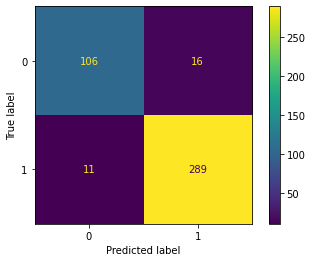

In [436]:
######### confusion_matrix #########
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(p.labels, dist_list>66)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig("Confusion_matrix.svg", dpi=2160)

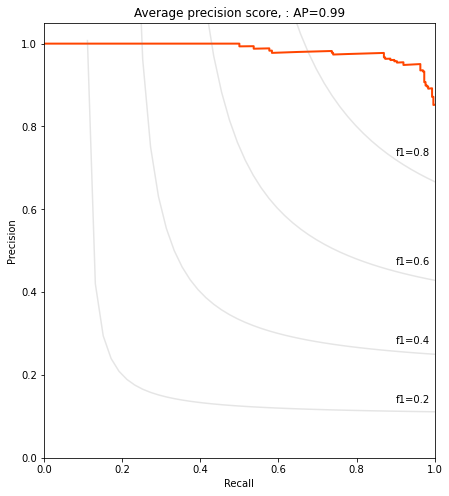

In [396]:
######### Precision_curve #########
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import pickle

precision, recall, thresholds = precision_recall_curve(p.labels, dist_list)


plt.figure(figsize=(7, 8))
plt.plot(recall, precision, color='orangered', lw=2)
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
average_precision = average_precision_score(p.labels, dist_list)
average_precision
plt.title(
    'Average precision score, : AP={0:0.2f}'
    .format(average_precision))

filename = 'mvg_effb4_p.lab'
outfile = open(filename,'wb')
pickle.dump(p.labels,outfile)
outfile.close()

filename = 'mvg_effb4_dist'
outfile = open(filename,'wb')
pickle.dump(dist_list,outfile)
outfile.close()

In [397]:
average_precision

0.9850594602389137

In [ ]:
labels, np.asarray(dist_list>30, dtype=np.float)

In [ ]:
p.values.flatten(), np.asarray(kt, dtype=np.float)

In [ ]:
fpr, tpr, thr

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(p.values.flatten(), kt)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (EfficientNet_B4) ')
plt.legend(loc="lower right")
plt.show()

#roc_auc

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

p = pd.read_csv("/home/ws575033/thesis_nb/Accuracy_mvg.csv")
p.head()

In [ ]:

disp = plt.bar(p.Models, p.Accuracy)

plt.axhline(np.max(p.Accuracy), linestyle='--', color='y',
            label='Best score')
y_pos = range(len(p.Accuracy))
plt.xticks(y_pos, p.Models, rotation=90)
plt.title("MVG Accuracy per_frame")
max(p.Accuracy)

In [ ]:
p = pd.read_csv("/home/ws575033/thesis_nb/Data_set/grid_values/Results/MVG/MVG_Accuracy.csv")

disp = plt.bar(p.Models, p.Accuracy)

plt.axhline(np.max(p.Accuracy), linestyle='--', color='y',
            label='Best score')
y_pos = range(len(p.Accuracy))
plt.xticks(y_pos, p.Models, rotation=90)
plt.title("MVG Accuracy per_frame")
max(p.Accuracy)